In [9]:
%load_ext autoreload
%autoreload 2

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_probability as tfp
import os
import pandas as pd
import feather
from urllib.request import urlretrieve
import tensorflow as tf

tfd = tfp.distributions
tfb = tfp.bijectors
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.optimizers import Adam

In [40]:
def get_if_not_there(filename = 'deer_train.feather'):
    if not os.path.isfile(filename):
         urlretrieve('https://raw.githubusercontent.com/tensorchiefs/dl_book/master/data/{}'.format(filename),
                    filename = filename)

get_if_not_there('deer_train.feather')
get_if_not_there('deer_test.feather')

In [41]:
df_train = feather.read_dataframe('deer_train.feather')
df_test = feather.read_dataframe('deer_test.feather')

In [42]:
df_train.head()

,wild,year,time,daytime,weekday
0,0,2002.0,0.000000,night.am,Sunday
1,0,2002.0,0.020833,night.am,Sunday
2,0,2002.0,0.041667,night.am,Sunday
3,1,2002.0,0.062500,night.am,Sunday
4,3,2002.0,0.083333,night.am,Sunday


In [43]:
df_test.head()

,wild,year,time,daytime,weekday
0,0,2010.0,2922.000000,night.am,Sunday
1,2,2010.0,2922.020833,night.am,Sunday
2,2,2010.0,2922.041667,night.am,Sunday
3,2,2010.0,2922.062500,night.am,Sunday
4,4,2010.0,2922.083333,night.am,Sunday


In [44]:
y_train = df_train.iloc[:,0].to_numpy(dtype='float32')
y_test = df_test.iloc[:,0].to_numpy(dtype='float32')
X_train = pd.get_dummies(df_train.iloc[:,2:]) #We wont use the year
X_test = pd.get_dummies(df_test.iloc[:,2:])
X_train.iloc[:,0] = X_train.iloc[:,0]/2922.02    #We divide by the maximal number to be in the range 0 to 1
X_test.iloc[:,0] = X_test.iloc[:,0]/2922.02 
del df_train, df_test

In [45]:
X_train.head()

,time,daytime_day.am,daytime_night.am,daytime_pre.sunrise.am,daytime_post.sunrise.am,daytime_day.pm,daytime_night.pm,daytime_pre.sunset.pm,daytime_post.sunset.pm,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.000007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.000014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.000029,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
X_test.head()

,time,daytime_day.am,daytime_night.am,daytime_pre.sunrise.am,daytime_post.sunrise.am,daytime_day.pm,daytime_night.pm,daytime_pre.sunset.pm,daytime_post.sunset.pm,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,0.999993,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.000007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.000015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.000022,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
y_train

array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [48]:
y_test

array([0., 2., 2., ..., 2., 1., 0.], dtype=float32)

In [49]:
X_train = X_train.to_numpy(dtype='float32')
X_test = X_test.to_numpy(dtype='float32')

X_train.shape,X_test.shape

((140256, 16), (35040, 16))

In [50]:
vals, counts = np.unique(y_train, return_counts=True)

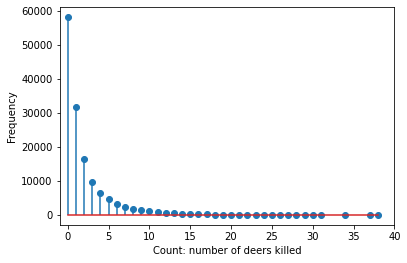

In [51]:
plt.stem(vals, counts)
plt.xlabel('Count: number of deers killed')
plt.ylabel('Frequency')
plt.xlim(-1,40)
plt.show()

## Linear Regression

In [52]:
model_lr = Sequential() 
model_lr.add(Dense(1,input_dim=(X_train.shape[1]), activation='linear')) 
model_lr.compile(loss='mean_squared_error',optimizer=tf.optimizers.Adam(learning_rate=0.01))
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 17        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [53]:
hist_lr = model_lr.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 5s 1ms/step - loss: 7.0828 - val_loss: 8.3541
Epoch 2/10
4383/4383 [==============================] - 4s 1ms/step - loss: 6.6551 - val_loss: 8.3677
Epoch 3/10
4383/4383 [==============================] - 4s 971us/step - loss: 6.5455 - val_loss: 8.3850
Epoch 4/10
4383/4383 [==============================] - 5s 1ms/step - loss: 6.6308 - val_loss: 8.3709
Epoch 5/10
4383/4383 [==============================] - 5s 1ms/step - loss: 6.6189 - val_loss: 8.3114
Epoch 6/10
4383/4383 [==============================] - 4s 989us/step - loss: 6.5318 - val_loss: 8.3234
Epoch 7/10
4383/4383 [==============================] - 5s 1ms/step - loss: 6.5142 - val_loss: 8.3339
Epoch 8/10
4383/4383 [==============================] - 6s 1ms/step - loss: 6.6399 - val_loss: 8.3251
Epoch 9/10
4383/4383 [==============================] - 6s 1ms/step - loss: 6.5825 - val_loss: 8.3696
Epoch 10/10
4383/4383 [==============================] - 6s 1ms/step - loss: 6

6.548098516464234

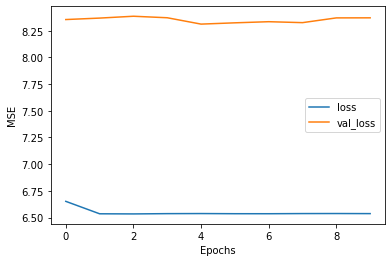

In [54]:
plt.plot(hist_lr.history['loss'])
plt.plot(hist_lr.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
np.mean(hist_lr.history['loss'])

In [55]:
# Calculation of the the optimal sigma 
n = len(y_train)
y_hat_train = model_lr.predict(X_train)
sigma_hat_2 = (n-1.)/(n-2.) * np.var(y_train - y_hat_train.flatten(),ddof=1)
print('Estimated variance ', sigma_hat_2)
print('Estimated standart deviation ', np.sqrt(sigma_hat_2))

y_hat = model_lr.predict(X_test) #Prediction on the testset

NLL_lr =  0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_test - y_hat.flatten())**2)/sigma_hat_2
print('NLL on training:', 0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_train - y_hat_train.flatten())**2)/sigma_hat_2)
print('NLL on test:',NLL_lr)

Estimated variance  6.54081668904009
Estimated standart deviation  2.5575020408672384
NLL on training: 2.358403286413754
NLL on test: 2.497808251019875


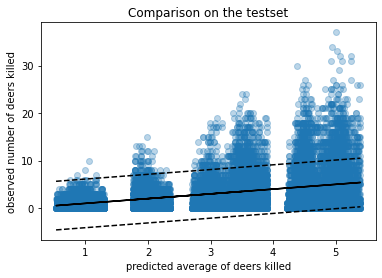

In [56]:
y_hat_test=model_lr.predict(X_test)
plt.scatter(y_hat_test, y_test,alpha=0.3)
sort_idx=np.argsort(y_hat_test,axis=0)
plt.plot(y_hat_test[sort_idx].flatten(), y_hat_test[sort_idx].flatten()+2*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(y_hat_test[sort_idx].flatten(), y_hat_test[sort_idx].flatten()-2*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

## Poisson Regression

In [57]:
inputs = Input(shape=(X_train.shape[1],))  
rate = Dense(1, activation=tf.exp)(inputs) 
p_y = tfp.layers.DistributionLambda(tfd.Poisson)(rate) 
model_p = Model(inputs=inputs, outputs=p_y) 

def NLL(y_true, y_hat): 
  return -y_hat.log_prob(y_true)

model_p.compile(Adam(learning_rate=0.01), loss=NLL)
model_p.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
distribution_lambda (Distrib multiple                  0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [58]:
hist_p = model_p.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 5s 1ms/step - loss: 1.9880 - val_loss: 2.0787
Epoch 2/10
4383/4383 [==============================] - 5s 1ms/step - loss: 1.9171 - val_loss: 2.0704
Epoch 3/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9100 - val_loss: 2.0727
Epoch 4/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9189 - val_loss: 2.0853
Epoch 5/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.9110 - val_loss: 2.1224
Epoch 6/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9204 - val_loss: 2.0772
Epoch 7/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.9149 - val_loss: 2.0721
Epoch 8/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9164 - val_loss: 2.0725
Epoch 9/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.9234 - val_loss: 2.0691
Epoch 10/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.918

Text(0.5, 0, 'Epochs')

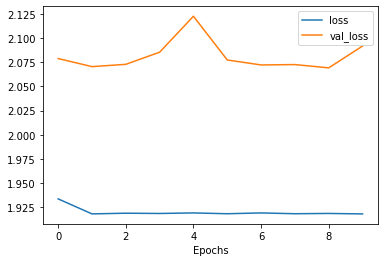

In [59]:
plt.plot(hist_p.history['loss'])
plt.plot(hist_p.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [65]:
model = Model(inputs=inputs, outputs=p_y) 

In [79]:
y_hat_test = model(X_test).mean().numpy().flatten()

In [80]:
NLL_train = model_p.evaluate(X_train, y_train,verbose=0) 
NLL_test = model_p.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

NLL on training: 1.917924165725708
NLL on test: 2.091630697250366


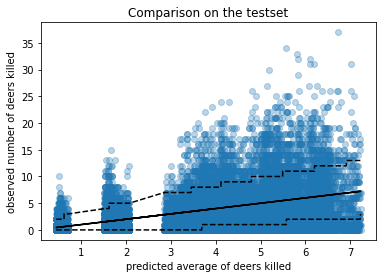

In [81]:
from scipy.stats import poisson
lower=poisson.ppf(0.025, y_hat_test)
upper=poisson.ppf(0.975, y_hat_test)

plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

## Poisson Regression with Hidden Layers

In [82]:
inputs = Input(shape=(X_train.shape[1],))  
x = Dense(100, activation="relu")(inputs) 
x = Dense(100, activation="relu")(x) 
x = Dense(10, activation="relu")(x) 
rate = Dense(1, activation=tf.exp)(x) 
p_y = tfp.layers.DistributionLambda(tfd.Poisson)(rate) 
model_p = Model(inputs=inputs, outputs=p_y) 

def NLL(y_true, y_hat): 
  return -y_hat.log_prob(y_true)

model_p.compile(Adam(learning_rate=0.01), loss=NLL)
model_p.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
_________________________________________________________________
distribution_lambda_1 (Distr multiple                  0         
Total params: 12,821
Trainable params: 12,821
Non-trainable params: 0
_______________________________________________________

In [83]:
hist_p = model_p.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9250 - val_loss: 2.0367
Epoch 2/10
4383/4383 [==============================] - 7s 1ms/step - loss: 1.8985 - val_loss: 2.0472
Epoch 3/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.8965 - val_loss: 2.1572
Epoch 4/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.8950 - val_loss: 2.0463
Epoch 5/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.8897 - val_loss: 2.0913
Epoch 6/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.8995 - val_loss: 2.0906
Epoch 7/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.9000 - val_loss: 2.0502
Epoch 8/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.9012 - val_loss: 2.0453
Epoch 9/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.8926 - val_loss: 2.0482
Epoch 10/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.891

Text(0.5, 0, 'Epochs')

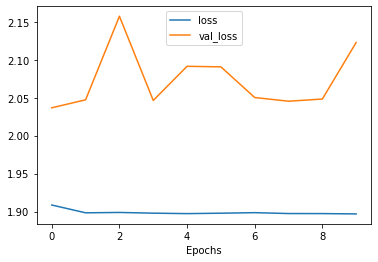

In [84]:
plt.plot(hist_p.history['loss'])
plt.plot(hist_p.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [85]:
model = Model(inputs=inputs, outputs=p_y)

In [86]:
y_hat_test = model(X_test).mean().numpy().flatten()

NLL_train = model_p.evaluate(X_train, y_train,verbose=0) 
NLL_test = model_p.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

NLL on training: 1.9056437015533447
NLL on test: 2.122615337371826


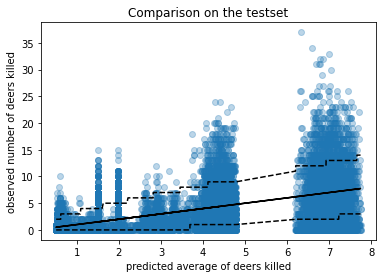

In [87]:
from scipy.stats import poisson
lower=poisson.ppf(0.025, y_hat_test)
upper=poisson.ppf(0.975, y_hat_test)

plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

## ZIP Regression

In [88]:
def zero_inf(out): 
    rate = tf.squeeze(tf.math.exp(out[:,0:1])) #A 
    s = tf.math.sigmoid(out[:,1:2]) #B  
    probs = tf.concat([1-s, s], axis=1) #C 
    return tfd.Mixture(
          cat=tfd.Categorical(probs=probs),#D
          components=[
          tfd.Deterministic(loc=tf.zeros_like(rate)), #E
          tfd.Poisson(rate=rate), #F 
        ])

#A The first component codes for the rate. We use exponential to guaranty values >0. We use the squeeze function to flatten the tensor.
#B The second component codes for the zero inflation, using sigmoid squeezes the value between 0 and 1.
#C The two probabilities for zeros or Poissonian  
#D The tfd.Categorical allows to create a mixture of two components. 
#E Zero as a deterministic value 
#F Value drawn from a Poissonian

In [89]:
## Definition of the custom parametrized distribution
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))  
out = Dense(2)(inputs)#A
p_y_zi = tfp.layers.DistributionLambda(zero_inf)(out)
model_zi = Model(inputs=inputs, outputs=p_y_zi)

def NLL(y_true, y_hat):
    return -y_hat.log_prob(tf.reshape(y_true,(-1,)))

model_zi.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=NLL)

#A A dense layer is used without activation. The transformation is done inside zero_inf function

model_zi.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 34        
_________________________________________________________________
distribution_lambda_2 (Distr multiple                  0         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [90]:
hist_zi = model_zi.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.8561 - val_loss: 1.9475
Epoch 2/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7906 - val_loss: 1.9453
Epoch 3/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7969 - val_loss: 1.9471
Epoch 4/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7910 - val_loss: 1.9355
Epoch 5/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7947 - val_loss: 1.9365
Epoch 6/10
4383/4383 [==============================] - 7s 1ms/step - loss: 1.8008 - val_loss: 1.9425
Epoch 7/10
4383/4383 [==============================] - 7s 2ms/step - loss: 1.7969 - val_loss: 1.9346
Epoch 8/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7948 - val_loss: 1.9444
Epoch 9/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.7903 - val_loss: 1.9300
Epoch 10/10
4383/4383 [==============================] - 6s 1ms/step - loss: 1.797

Text(0.5, 0, 'Epochs')

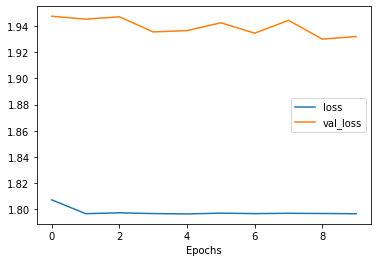

In [91]:
plt.plot(hist_zi.history['loss'])
plt.plot(hist_zi.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [92]:
model = Model(inputs=inputs, outputs=p_y_zi) 

In [94]:
y_hat_test = model(X_test).mean().numpy().flatten()

NLL_train = model_zi.evaluate(X_train, y_train,verbose=0) 
NLL_test = model_zi.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

NLL on training: 1.797261118888855
NLL on test: 1.9319971799850464


In [98]:
# workaround; only sample from 10 datapoints at once, otherwise we would get ram errors
upper=[]
lower=[]
for i in range(0,np.int(len(X_test)/10)):
  samples_tmp=model_zi(X_test[(i*10):(i*10)+10]).sample(5000).numpy()
  upper=np.append(upper,np.quantile(samples_tmp,0.975,axis=0))
  lower=np.append(lower,np.quantile(samples_tmp,0.025,axis=0))

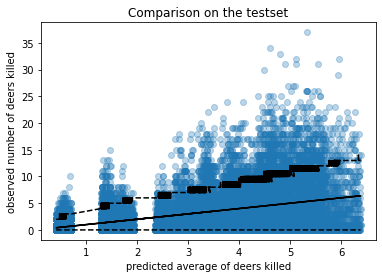

In [99]:
plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

## ZIP Regression with Hidden Layers

In [100]:
def zero_inf(out): 
    rate = tf.squeeze(tf.math.exp(out[:,0:1])) #A 
    s = tf.math.sigmoid(out[:,1:2]) #B  
    probs = tf.concat([1-s, s], axis=1) #C 
    return tfd.Mixture(
          cat=tfd.Categorical(probs=probs),#D
          components=[
          tfd.Deterministic(loc=tf.zeros_like(rate)), #E
          tfd.Poisson(rate=rate), #F 
        ])

#A The first component codes for the rate. We use exponential to guaranty values >0. We use the squeeze function to flatten the tensor.
#B The second component codes for the zero inflation, using sigmoid squeezes the value between 0 and 1.
#C The two probabilities for zeros or Poissonian  
#D The tfd.Categorical allows to create a mixture of two components. 
#E Zero as a deterministic value 
#F Value drawn from a Poissonian

In [101]:
## Definition of the custom parametrized distribution
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))  
x = Dense(100, activation="relu")(inputs) 
x = Dense(100, activation="relu")(x) 
x = Dense(10, activation="relu")(x) 
out = Dense(2)(x)#A
p_y_zi = tfp.layers.DistributionLambda(zero_inf)(out)
model_zi = Model(inputs=inputs, outputs=p_y_zi)

def NLL(y_true, y_hat):
    return -y_hat.log_prob(tf.reshape(y_true,(-1,)))

model_zi.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=NLL)

#A A dense layer is used without activation. The transformation is done inside zero_inf function

model_zi.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
_________________________________________________________________
distribution_lambda_3 (Distr multiple                  0         
Total params: 12,832
Trainable params: 12,832
Non-trainable params: 0
_______________________________________________________

In [102]:
hist_zi = model_zi.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 14s 3ms/step - loss: 1.8180 - val_loss: 1.9117
Epoch 2/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.7852 - val_loss: 1.9117
Epoch 3/10
4383/4383 [==============================] - 11s 2ms/step - loss: 1.7819 - val_loss: 1.9156
Epoch 4/10
4383/4383 [==============================] - 14s 3ms/step - loss: 1.7818 - val_loss: 1.9179
Epoch 5/10
4383/4383 [==============================] - 13s 3ms/step - loss: 1.7857 - val_loss: 1.9190
Epoch 6/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.7811 - val_loss: 1.9297
Epoch 7/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.7822 - val_loss: 1.9327
Epoch 8/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.7743 - val_loss: 1.9144
Epoch 9/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.7741 - val_loss: 1.9125
Epoch 10/10
4383/4383 [==============================] - 9s 2ms/step - loss:

Text(0.5, 0, 'Epochs')

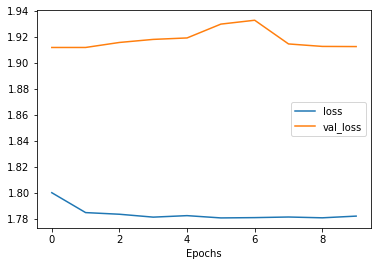

In [103]:
plt.plot(hist_zi.history['loss'])
plt.plot(hist_zi.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [104]:
model = Model(inputs=inputs, outputs=p_y_zi) 

In [105]:
y_hat_test = model(X_test).mean().numpy().flatten()

NLL_train = model_zi.evaluate(X_train, y_train,verbose=0) 
NLL_test = model_zi.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

NLL on training: 1.783557653427124
NLL on test: 1.9124014377593994


In [106]:
# workaround; only sample from 10 datapoints at once, otherwise we would get ram errors
upper=[]
lower=[]
for i in range(0,np.int(len(X_test)/10)):
  samples_tmp=model_zi(X_test[(i*10):(i*10)+10]).sample(5000).numpy()
  upper=np.append(upper,np.quantile(samples_tmp,0.975,axis=0))
  lower=np.append(lower,np.quantile(samples_tmp,0.025,axis=0))


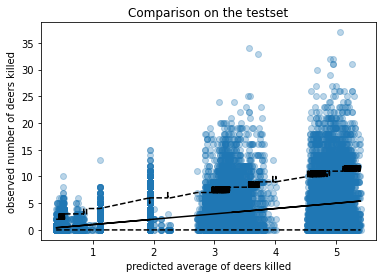

In [107]:
plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

## Regression with a discretized logistic mixture distribution

In [108]:
def quant_mixture_logistic(out, bits=8, num=3): 
    loc, un_scale, logits = tf.split(out,
                                     num_or_size_splits=num,
                                     axis=-1)
    scale = tf.nn.softplus(un_scale)
    discretized_logistic_dist = tfd.QuantizedDistribution(
    distribution=tfd.TransformedDistribution(
        distribution=tfd.Logistic(loc=loc, scale=scale),
        bijector=tfb.AffineScalar(shift=-0.5)),
    low=0.,
    high=2**bits - 1.)
    mixture_dist = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(logits=logits), #logits will be normalized to one
        components_distribution=discretized_logistic_dist)
    return mixture_dist

In [109]:
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))  
out = Dense(9)(inputs)
p_y = tfp.layers.DistributionLambda(quant_mixture_logistic)(out)

model = Model(inputs=inputs, outputs=p_y)

def NLL(y_true, y_hat):
  return -y_hat.log_prob(tf.reshape(y_true,(-1,)))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=NLL)

model.summary()

Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 9)                 153       
_________________________________________________________________
distribution_lambda_4 (Distr multiple                  0         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [110]:
hist_mm = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6759 - val_loss: 1.7152
Epoch 2/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6177 - val_loss: 1.7030
Epoch 3/10
4383/4383 [==============================] - 8s 2ms/step - loss: 1.6233 - val_loss: 1.7037
Epoch 4/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6168 - val_loss: 1.7036
Epoch 5/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6106 - val_loss: 1.7063
Epoch 6/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6111 - val_loss: 1.7099
Epoch 7/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6154 - val_loss: 1.7007
Epoch 8/10
4383/4383 [==============================] - 9s 2ms/step - loss: 1.6126 - val_loss: 1.7105
Epoch 9/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6179 - val_loss: 1.7016
Epoch 10/10
4383/4383 [==============================] - 11s 2ms/step - loss: 1.

Text(0.5, 0, 'Epochs')

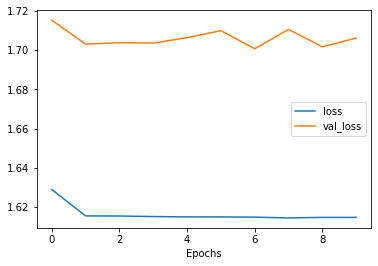

In [111]:
plt.plot(hist_mm.history['loss'])
plt.plot(hist_mm.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [125]:
print(-np.mean(model(X_train).log_prob(y_train)))
print(-np.mean(model(X_test).log_prob(y_test)))

1.613806
1.7061273


In [150]:
X_test.shape

(35040, 16)

In [154]:
NLL_train = model.evaluate(X_train, y_train,verbose=0) 
NLL_test = model.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

preds = np.zeros((1000,len(y_test.flatten())))
for i in range(0,1000):
  preds[i,:] = model(X_test).sample().numpy()# sample from the QuantizedDistribution
y_hat_test=np.average(preds,axis=0)


NLL on training: 1.6138094663619995
NLL on test: 1.7061270475387573


In [155]:
# workaround; only sample from 10 datapoints at once, otherwise we would get ram errors
upper=[]
lower=[]
for i in range(0,np.int(len(X_test)/10)):
  samples_tmp=model(X_test[(i*10):(i*10)+10]).sample(5000).numpy()
  upper=np.append(upper,np.quantile(samples_tmp,0.975,axis=0))
  lower=np.append(lower,np.quantile(samples_tmp,0.025,axis=0))


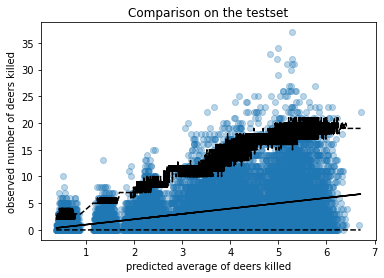

In [156]:
plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()

### Regression with a discretized logistic mixture distribution and hidden layers

In [157]:
  def quant_mixture_logistic(out, bits=8, num=3): 
    loc, un_scale, logits = tf.split(out,
                                     num_or_size_splits=num,
                                     axis=-1)
    scale = tf.nn.softplus(un_scale)
    discretized_logistic_dist = tfd.QuantizedDistribution(
    distribution=tfd.TransformedDistribution(
        distribution=tfd.Logistic(loc=loc, scale=scale),
        bijector=tfb.AffineScalar(shift=-0.5)),
    low=0.,
    high=2**bits - 1.)
    mixture_dist = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(logits=logits), #logits will be normalized to one
        components_distribution=discretized_logistic_dist)
    return mixture_dist                               

In [158]:
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
x = Dense(100, activation="relu")(inputs) 
x = Dense(100, activation="relu")(x) 
x = Dense(10, activation="relu")(x) 
out = Dense(9)(x)
p_y = tfp.layers.DistributionLambda(quant_mixture_logistic)(out)

model = Model(inputs=inputs, outputs=p_y)

def NLL(y_true, y_hat):
  return -y_hat.log_prob(tf.reshape(y_true,(-1,)))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=NLL)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_16 (Dense)             (None, 9)                 99        
_________________________________________________________________
distribution_lambda_5 (Distr multiple                  0         
Total params: 12,909
Trainable params: 12,909
Non-trainable params: 0
_______________________________________________________

In [159]:
hist_mm = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
4383/4383 [==============================] - 13s 3ms/step - loss: 1.6438 - val_loss: 1.6992
Epoch 2/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.6126 - val_loss: 1.7173
Epoch 3/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6116 - val_loss: 1.6998
Epoch 4/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6212 - val_loss: 1.6999
Epoch 5/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6192 - val_loss: 1.7036
Epoch 6/10
4383/4383 [==============================] - 10s 2ms/step - loss: 1.6131 - val_loss: 1.6991
Epoch 7/10
4383/4383 [==============================] - 11s 3ms/step - loss: 1.6170 - val_loss: 1.7103
Epoch 8/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.6166 - val_loss: 1.7050
Epoch 9/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.6190 - val_loss: 1.7121
Epoch 10/10
4383/4383 [==============================] - 12s 3ms/step - l

Text(0.5, 0, 'Epochs')

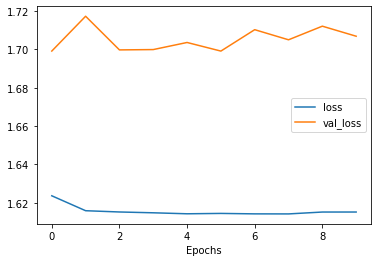

In [160]:
plt.plot(hist_mm.history['loss'])
plt.plot(hist_mm.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')

In [161]:
print(-np.mean(model(X_train).log_prob(y_train)))
print(-np.mean(model(X_test).log_prob(y_test)))

1.6172385
1.706899


In [163]:
NLL_train = model.evaluate(X_train, y_train,verbose=0) 
NLL_test = model.evaluate(X_test, y_test,verbose=0) 

print('NLL on training:', NLL_train)
print('NLL on test:', NLL_test)

preds = np.zeros((1000,len(y_test.flatten())))
for i in range(0,1000):
  preds[i,:] = model(X_test).sample().numpy()# sample from the QuantizedDistributio
y_hat_test=np.average(preds,axis=0)


NLL on training: 1.6172385215759277
NLL on test: 1.7068994045257568


In [164]:
# workaround; only sample from 10 datapoints at once, otherwise we would get ram errors
upper=[]
lower=[]
for i in range(0,np.int(len(X_test)/10)):
  samples_tmp=model(X_test[(i*10):(i*10)+10]).sample(5000).numpy()
  upper=np.append(upper,np.quantile(samples_tmp,0.975,axis=0))
  lower=np.append(lower,np.quantile(samples_tmp,0.025,axis=0))


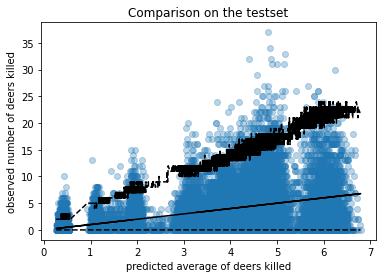

In [165]:
plt.scatter(y_hat_test, y_test, alpha=0.3)
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), lower[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test[np.argsort(y_hat_test,axis=0)].flatten(), upper[np.argsort(y_hat_test,axis=0)],linestyle='dashed',c="black")
plt.plot(y_hat_test, y_hat_test, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of deers killed')
plt.ylabel('observed number of deers killed')
plt.show()